In [114]:
#!/usr/bin/env python
%matplotlib inline

from PyOPC.OPCContainers import *
from PyOPC.XDAClient import XDAClient

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
address=''
%run 'address'  #lese geheime address='http://ip-number:port'


In [116]:
xda = XDAClient(OPCServerAddress=address,
                ReturnErrorText=True)

In [117]:
path='Loc/Wec/Plant2/Log/T101a1/Raw'
itemcollect=[]
for i in xda.Browse(ItemName=path)[0][:]:
    #print i.Name
    if not i.HasChildren:
        i = ItemContainer(ItemName=path+"/"+i.Name)
        itemcollect.append(i)
#print itemcollect

all=xda.Read(itemcollect)

In [118]:
log=[]
x=0
for i in all[0]:
    i.Name=str.replace(i.ItemName,path+"/","")
    #print i.Name,"  ",i.Value
    if i.Name.startswith("Val-"):
        log.append(i.Value)
    x=x+1
#print log

In [130]:
descr=[
u'Anzahl der Abtastwerte',
u'Spinnertemperatur [°C]',
u'Temperatur Lager vorn [°C]',
u'Temperatur Lager hinten [°C]',
u'Kühlblech Pitch Blatt A [°C]',
u'Kühlblech Pitch Blatt B [°C]',
u'Kühlblech Pitch Blatt C [°C]',
u'Pitchkiste Blatt A [°C]',
u'Pitchkiste Blatt B [°C]',
u'Pitchkiste Blatt C [°C]',

u'Rotor Temperatur 1 [°C]',
u'Rotor Temperatur 2 [°C]',
u'Stator Temperatur 1 [°C]',
u'Stator Temperatur 2 [°C]',
u'Umgebungstemperatur Gondel [°C]',
'?',
u'Gondeltemperatur [°C]',
u'Temperatur Gondelsteuerschrank [°C]',
u'Kühlblech Gleichrichter 1 [°C]',
u'Kühlblech Gleichrichter 2 [°C]',
u'Temperatur Gleichrichterschrank [°C]',
u'Kühlblech Erregung [°C]',
u'Umgebungstemperatur [°C]',
u'Turmtemperatur [°C]',
u'Temperatur Steuerschrank [°C]',
u'Transformatortemperatur [°C]']

#Auf Verdacht:
#Beschreibungen hinter Rotor rausgenommen:


In [131]:
log_df=pd.DataFrame(data=log[::-1],columns=descr)

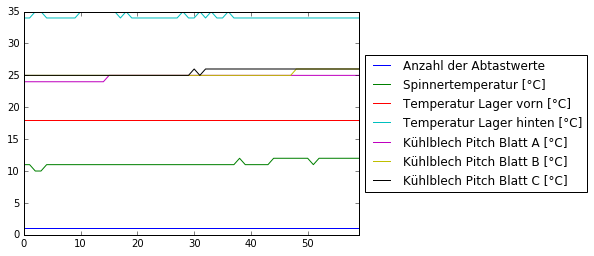

In [132]:
log_df.ix[:,0:7].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5));

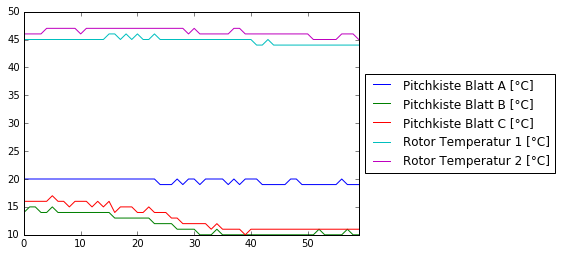

In [122]:
log_df.ix[:,7:12].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5));

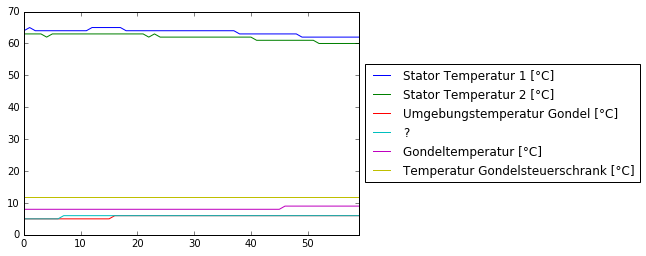

In [123]:
log_df.ix[:,12:18].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5));

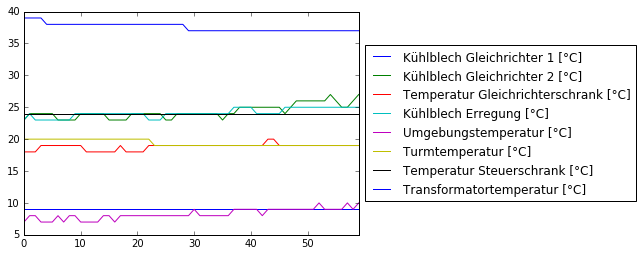

In [124]:
log_df.ix[:,18:26].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [125]:
log_df.head()

,Anzahl der Abtastwerte,Spinnertemperatur [°C],Temperatur Lager vorn [°C],Temperatur Lager hinten [°C],Kühlblech Pitch Blatt A [°C],Kühlblech Pitch Blatt B [°C],Kühlblech Pitch Blatt C [°C],Pitchkiste Blatt A [°C],Pitchkiste Blatt B [°C],Pitchkiste Blatt C [°C],...,Gondeltemperatur [°C],Temperatur Gondelsteuerschrank [°C],Kühlblech Gleichrichter 1 [°C],Kühlblech Gleichrichter 2 [°C],Temperatur Gleichrichterschrank [°C],Kühlblech Erregung [°C],Umgebungstemperatur [°C],Turmtemperatur [°C],Temperatur Steuerschrank [°C],Transformatortemperatur [°C]
0,1,11,18,34,24,25,25,20,14,16,...,8,12,9,23,18,23,7,20,24,39
1,1,11,18,34,24,25,25,20,15,16,...,8,12,9,24,18,24,8,20,24,39
2,1,10,18,35,24,25,25,20,15,16,...,8,12,9,24,18,23,8,20,24,39
3,1,10,18,35,24,25,25,20,14,16,...,8,12,9,24,19,23,7,20,24,39
4,1,11,18,34,24,25,25,20,14,16,...,8,12,9,24,19,23,7,20,24,38


In [126]:
log_df.ix[:5,4:15]

,Kühlblech Pitch Blatt A [°C],Kühlblech Pitch Blatt B [°C],Kühlblech Pitch Blatt C [°C],Pitchkiste Blatt A [°C],Pitchkiste Blatt B [°C],Pitchkiste Blatt C [°C],Rotor Temperatur 1 [°C],Rotor Temperatur 2 [°C],Stator Temperatur 1 [°C],Stator Temperatur 2 [°C],Umgebungstemperatur Gondel [°C]
0,24,25,25,20,14,16,45,46,64,63,5
1,24,25,25,20,15,16,45,46,65,63,5
2,24,25,25,20,15,16,45,46,64,63,5
3,24,25,25,20,14,16,45,46,64,63,5
4,24,25,25,20,14,16,45,47,64,62,5
5,24,25,25,20,15,17,45,47,64,63,5


In [127]:
log_df.ix[:5,14:]

,Umgebungstemperatur Gondel [°C],?,Gondeltemperatur [°C],Temperatur Gondelsteuerschrank [°C],Kühlblech Gleichrichter 1 [°C],Kühlblech Gleichrichter 2 [°C],Temperatur Gleichrichterschrank [°C],Kühlblech Erregung [°C],Umgebungstemperatur [°C],Turmtemperatur [°C],Temperatur Steuerschrank [°C],Transformatortemperatur [°C]
0,5,5,8,12,9,23,18,23,7,20,24,39
1,5,5,8,12,9,24,18,24,8,20,24,39
2,5,5,8,12,9,24,18,23,8,20,24,39
3,5,5,8,12,9,24,19,23,7,20,24,39
4,5,5,8,12,9,24,19,23,7,20,24,38
5,5,5,8,12,9,24,19,23,7,20,24,38


In [128]:
path2='Loc/Wec/Plant2/Log/T101a1'

In [129]:
xda.Browse(ItemName=path2)
path3='Loc/Wec/Plant2/Log/T101a1'+'/RawSmpTime'
xda.Read(ItemContainer(ItemName=path3))

([ItemContainer(QualityField=good, VendorField=0, Value=60, ItemPath=, IsEmpty=False, _Properties={}, ClientItemHandle=ZSI_OMT5htI4Do_ReadItem_0, ItemName=Loc/Wec/Plant2/Log/T101a1/RawSmpTime, LimitField=none)],
 {'ClientRequestHandle': 'ZSI_OMT5htI4Do_Read',
  'RcvTime': datetime.datetime(2016, 2, 7, 10, 39, 32),
  'ReplyTime': datetime.datetime(2016, 2, 7, 10, 39, 32),
  'RevisedLocaleID': 'en-us',
  'ServerState': 'running'})